# Predicting CPU Efficiency of HPC Cluster Jobs with Nerual Network

In a HPC environment, users submit their scripts/programs as jobs to a Job Scheduler. 
Users can request for resources for their scripts/programs, e.g.: Number of CPU cores, Number of GPUs, Amount of Memory (RAM).
The Job Scheduler then dispatches the user's job to remote servers (nodes) when resources are available.

The provided dataset consists of logs of completed/ended jobs. It records the requested resource values as well as actual resource consumption values of each job. The goal of this project is to predict which requests are inefficient i.e. does not utilise all the cores it asks for. 

This allows us to allocate resources in a more efficient manner.

## Data Description

### Columns
'user','dept','queue','Exit_status',
'Resource_List.fluent_lic', 'Resource_List.mem',
'Resource_List.mpiprocs', 'Resource_List.ncpus', 'Resource_List.ngpus',
'Resource_List.nodect', 'Resource_List.walltime', 'cluster', 'ctime', 'datetime', 'end',
'etime', 'exec_host', 'exec_vnode', 'group', 'job_id',
'qtime', 'resources_used.GPU_duration','resources_used.GPU_maxGpuMemoryUsed',
'resources_used.GPU_energyConsumed', 'resources_used.cpupercent',
'resources_used.cput', 'resources_used.mem', 'resources_used.ncpus',
'resources_used.vmem', 'resources_used.walltime',
'run_count', 'start', 'status', 'wait_time', 'gpu0.mem_max', 'gpu0.smUtil_avg',
'gpu0.smUtil_max', 'gpu1.mem_max', 'gpu1.smUtil_avg', 'gpu1.smUtil_max',
'gpu2.mem_max', 'gpu2.smUtil_avg', 'gpu2.smUtil_max', 'gpu3.mem_max',
'gpu3.smUtil_avg', 'gpu3.smUtil_max',


In [2]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(2020)

## Load Data

In [3]:
data = pd.read_csv("C:\\Users\\reonh\\Documents\\NUS\\1920 S2\\DYOM\\filtered_062019.csv", index_col = 0)
data0 = data

In [4]:
data.head()

,user,dept,queue,Exit_status,Resource_List.fluent_lic,Resource_List.mem,Resource_List.mpiprocs,Resource_List.ncpus,Resource_List.ngpus,Resource_List.nodect,...,gpu0.smUtil_max,gpu1.mem_max,gpu1.smUtil_avg,gpu1.smUtil_max,gpu2.mem_max,gpu2.smUtil_avg,gpu2.smUtil_max,gpu3.mem_max,gpu3.smUtil_avg,gpu3.smUtil_max
0,c4ee464d6b4108a3a3cfc83891b6e535883b01ec678ced...,CEE,parallel20,0,0.0,41943040.0,0.0,20,0.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,c4ee464d6b4108a3a3cfc83891b6e535883b01ec678ced...,CEE,parallel8,0,0.0,20971520.0,0.0,8,0.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,c4ee464d6b4108a3a3cfc83891b6e535883b01ec678ced...,CEE,parallel20,0,0.0,41943040.0,0.0,20,0.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,c4ee464d6b4108a3a3cfc83891b6e535883b01ec678ced...,CEE,parallel20,0,0.0,41943040.0,0.0,20,0.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,c4ee464d6b4108a3a3cfc83891b6e535883b01ec678ced...,CEE,parallel8,0,0.0,20971520.0,0.0,8,0.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
data.index

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            39378, 39379, 39380, 39381, 39382, 39383, 39384, 39385, 39386,
            39387],
           dtype='int64', length=787777)

Observe that while the data has 781592 rows, the unique indices only reach up to 39837. We drop the index row and create a new one that uniquely indexes each row.

In [6]:
data = data.reset_index().drop("index", axis = 1)
data

,user,dept,queue,Exit_status,Resource_List.fluent_lic,Resource_List.mem,Resource_List.mpiprocs,Resource_List.ncpus,Resource_List.ngpus,Resource_List.nodect,...,gpu0.smUtil_max,gpu1.mem_max,gpu1.smUtil_avg,gpu1.smUtil_max,gpu2.mem_max,gpu2.smUtil_avg,gpu2.smUtil_max,gpu3.mem_max,gpu3.smUtil_avg,gpu3.smUtil_max
0,c4ee464d6b4108a3a3cfc83891b6e535883b01ec678ced...,CEE,parallel20,0,0.0,41943040.0,0.0,20,0.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,c4ee464d6b4108a3a3cfc83891b6e535883b01ec678ced...,CEE,parallel8,0,0.0,20971520.0,0.0,8,0.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,c4ee464d6b4108a3a3cfc83891b6e535883b01ec678ced...,CEE,parallel20,0,0.0,41943040.0,0.0,20,0.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,c4ee464d6b4108a3a3cfc83891b6e535883b01ec678ced...,CEE,parallel20,0,0.0,41943040.0,0.0,20,0.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,c4ee464d6b4108a3a3cfc83891b6e535883b01ec678ced...,CEE,parallel8,0,0.0,20971520.0,0.0,8,0.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
787772,c4ee464d6b4108a3a3cfc83891b6e535883b01ec678ced...,CEE,parallel20,0,0.0,41943040.0,0.0,20,0.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
787773,c4ee464d6b4108a3a3cfc83891b6e535883b01ec678ced...,CEE,parallel8,0,0.0,20971520.0,0.0,8,0.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
787774,c4ee464d6b4108a3a3cfc83891b6e535883b01ec678ced...,CEE,parallel8,0,0.0,20971520.0,0.0,8,0.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
787775,c4ee464d6b4108a3a3cfc83891b6e535883b01ec678ced...,CEE,parallel20,0,0.0,41943040.0,0.0,20,0.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## EDA

The target variable is CPU Efficiency.

An ideal efficient job should use as close as possible to 100%, however realistically we define efficient CPU utilisation as above 75% of requested CPU cores.

**CPU_EFF = (USED_CPUTIME / USED_WALLTIME) / REQUESTED_NCPUS**

For this project I use Neural Networks to predict job efficiency. I will model this problem first as a regression, then as a classification task. 


In [7]:
#create target variable - CPU Efficiency
data["cpu_eff"] = (data["resources_used.cput"] / data["resources_used.walltime"] )/data["Resource_List.ncpus"]
data["cpu_eff"].head()

0    0.037500
1    0.078125
2    0.033333
3    0.030000
4    0.069444
Name: cpu_eff, dtype: float64

In [8]:
data["cpu_eff"].describe()

count    787776.000000
mean          0.105315
std           0.186706
min           0.000000
25%           0.033333
50%           0.042857
75%           0.083333
max          10.786887
Name: cpu_eff, dtype: float64

The max value for efficiency is 10 - which is greater than 1.These might be outliers or anomalies.

In [9]:
anomalies = list(filter(lambda x : x>1, data["cpu_eff"]))
print(len(anomalies)/len(data["cpu_eff"])*100, "% of the data is potentially anomalous") 

0.7849937228428857 % of the data is potentially anomalous


Since the anomalous data makes up less than 1% of the dataset, we simply drop the anomalous values with efficiency > 100%

In [10]:
data = data[data["cpu_eff"] <= 1].reset_index().drop("index", axis=1)

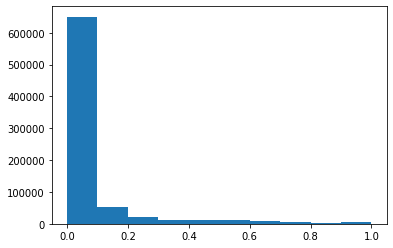

In [11]:
#distribution of efficiency
ax = plt.hist(data["cpu_eff"], bins=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])

Majority of the data points lie between 0 and 1. The bin with the most data points is 0 to 0.1.
We can use the histogram data to do stratified sampling for the train and testing set.

In [12]:
def binner(col):
    return [int(c*10) if c*10<=10 else 11 for c in col ]

In [13]:
data["eff_bin"] = binner(data["cpu_eff"].copy())
data["eff_bin"].head()

0    0
1    0
2    0
3    0
4    0
Name: eff_bin, dtype: int64

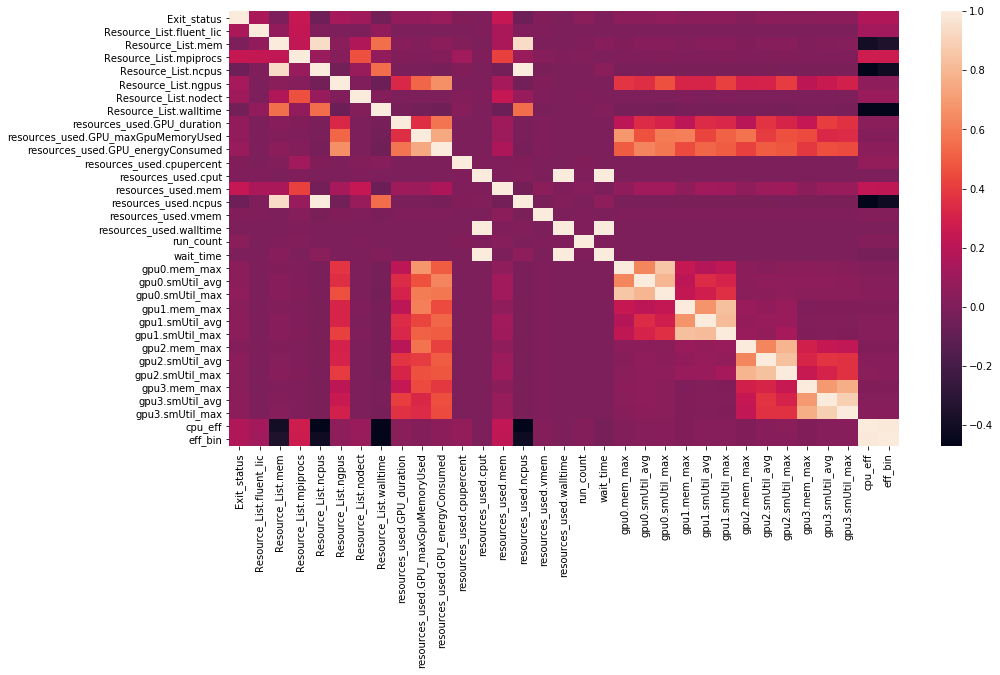

In [14]:
# Finding relationships - start with corr plot
corrMatrix = data.corr()
plt.figure(figsize=(15,8))
ax = sn.heatmap(corrMatrix)

Observe that most of the features are uncorrelated with CPU efficiency, exccept for some with obviously negative correlations. In the rest of the columns, there is some collinearity ovserved. 

We should now inspect the last column (correlation with CPU efficiency) in more detail.

In [15]:
cpu_rel = corrMatrix["cpu_eff"].sort_values()
cpu_rel

Resource_List.ncpus                   -0.470001
resources_used.ncpus                  -0.469931
Resource_List.walltime                -0.462635
Resource_List.mem                     -0.397331
wait_time                             -0.026285
resources_used.walltime               -0.003658
resources_used.cput                   -0.003107
gpu1.mem_max                           0.009563
gpu3.mem_max                           0.011353
gpu2.mem_max                           0.012066
gpu0.mem_max                           0.013160
resources_used.vmem                    0.018795
resources_used.GPU_maxGpuMemoryUsed    0.019680
run_count                              0.020284
gpu1.smUtil_avg                        0.026133
gpu3.smUtil_avg                        0.028038
gpu0.smUtil_avg                        0.029083
gpu1.smUtil_max                        0.029356
gpu3.smUtil_max                        0.030914
gpu0.smUtil_max                        0.031755
gpu2.smUtil_avg                        0

We observe that most of the GPU Data is irrelevant. We will decide if they should be dropped later during feature selection.

## Data Preprocessing

In this section we create a pipleine to transform and prepare our data for fitting into a neural network model.

In [16]:
#creating train test split
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

In [17]:
for train_index, test_index in split.split(data, data["eff_bin"]):
    strat_train_set = data.loc[train_index]
    strat_test_set = data.loc[test_index]

In [18]:
y_train = data.loc[train_index]["cpu_eff"]
y_test = data.loc[test_index]["cpu_eff"]

In [19]:
data["cpu_eff"][data["cpu_eff"].isna()]

Series([], Name: cpu_eff, dtype: float64)

In [20]:
data= data.drop(["cpu_eff","eff_bin"], axis =1)

In [21]:
#use pipelines for data processing
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import FeatureUnion, Pipeline 
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer


class DataFrameSelector(BaseEstimator, TransformerMixin): 
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values
    
class DataFrameSelectorCat(BaseEstimator, TransformerMixin): 
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values.astype(str)

class CustomLabelBinarizer(BaseEstimator, TransformerMixin):
    def __init__(self, sparse_output=False):
        self.sparse_output = sparse_output
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        for i,col in enumerate(X):
                X[i] = LabelEncoder().fit_transform(col)
        return X

In [22]:
#get numerical columns
numerical = list(filter(lambda y: y,map(lambda x: x if data[x].dtype!= object else None, data.columns)))
numerical

['Exit_status',
 'Resource_List.fluent_lic',
 'Resource_List.mem',
 'Resource_List.mpiprocs',
 'Resource_List.ncpus',
 'Resource_List.ngpus',
 'Resource_List.nodect',
 'Resource_List.walltime',
 'resources_used.GPU_duration',
 'resources_used.GPU_maxGpuMemoryUsed',
 'resources_used.GPU_energyConsumed',
 'resources_used.cpupercent',
 'resources_used.cput',
 'resources_used.mem',
 'resources_used.ncpus',
 'resources_used.vmem',
 'resources_used.walltime',
 'run_count',
 'wait_time',
 'gpu0.mem_max',
 'gpu0.smUtil_avg',
 'gpu0.smUtil_max',
 'gpu1.mem_max',
 'gpu1.smUtil_avg',
 'gpu1.smUtil_max',
 'gpu2.mem_max',
 'gpu2.smUtil_avg',
 'gpu2.smUtil_max',
 'gpu3.mem_max',
 'gpu3.smUtil_avg',
 'gpu3.smUtil_max']

In [23]:
#get categorical columns
categorical = list(filter(lambda y: y,map(lambda x: x if data[x].dtype== object else None, data.columns)))
categorical

['user',
 'dept',
 'queue',
 'cluster',
 'ctime',
 'datetime',
 'end',
 'etime',
 'exec_host',
 'exec_vnode',
 'group',
 'job_id',
 'qtime',
 'start',
 'status']

In [24]:
#drop columns from df which should not be label encoded
notcat = []
for column in categorical:
    c = data[column].nunique()
    print(column, c)
    if c > 300:
        notcat.append(column)
print(notcat)

user 251
dept 37
queue 19
cluster 9
ctime 27031
datetime 569007
end 569007
etime 27304
exec_host 1537
exec_vnode 3246
group 2
job_id 781592
qtime 27104
start 582041
status 1
['ctime', 'datetime', 'end', 'etime', 'exec_host', 'exec_vnode', 'job_id', 'qtime', 'start']


In [25]:
#datetime is most likely irrelevant in this problem. 
#exec host and vnode is also most likely irrelevant
data = data.drop(notcat, axis =1)

In [26]:
categorical = list(filter(lambda x: x not in notcat, categorical))

In [27]:
num_pipeline = Pipeline([
    ('selector', DataFrameSelector(numerical)),
    ('imputer', SimpleImputer(strategy="median")),
    ('std_scaler', StandardScaler()),
    ])
cat_pipeline = Pipeline([
    ('selector', DataFrameSelectorCat(categorical)),
    ('label_binarizer', CustomLabelBinarizer()),
    ])
full_pipeline = FeatureUnion(transformer_list=[
    ("num_pipeline", num_pipeline),
    ("cat_pipeline", cat_pipeline),
    ])

After constructing the pipeline, we transform the data and split the data into train and test sets

In [28]:
#fit data
pbs = full_pipeline.fit_transform(data)

In [29]:
X_train = pbs[train_index]
X_test = pbs[test_index]

## Feature Selection/Engineering

There are more than 700k rows in the data, and >30 features for each data point. To increase training speed, we only choose the top 10 most important features in prediciting efficiency.

We employ a statistical technique cakked F-test to find the p-values of each regressor on the cpu effficiency. The top 10 (smallest) p-value features are used to train the neural network later on.

In [30]:
np.unique(np.isnan(y_test))

array([False])

In [31]:
#use linear regression to select k best features by their F score 
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectKBest

selector = SelectKBest(score_func=f_regression, k=10)
X_train_10 = selector.fit_transform(X_train, y_train)

C:\Users\reonh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:755: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  estimator=estimator)


We have reduced the number of dimensions to 10

## Model Development

I am using Keras to create the Dense Neural Network model. The following model is created for the regression task of predicting cpu efficiency

In [32]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.wrappers.scikit_learn import KerasRegressor

In [33]:
model = Sequential()
model.add(Dense(12, input_dim=10, kernel_initializer='normal', activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='linear'))
model.summary()
model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                132       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 245
Trainable params: 245
Non-trainable params: 0
_________________________________________________________________


## Training 1.0

In [34]:
nn = model.fit(X_train_10.astype(float), np.array(y_train), epochs=3, batch_size=2,  verbose=1, validation_split=0.2)

Train on 500218 samples, validate on 125055 samples
Epoch 1/3
500218/500218 [==============================] - 301s 601us/sample - loss: 0.0113 - mse: 0.0113 - mae: 0.0491 - val_loss: 0.0110 - val_mse: 0.0110 - val_mae: 0.0474
Epoch 2/3
500218/500218 [==============================] - 311s 621us/sample - loss: 0.0109 - mse: 0.0109 - mae: 0.0481 - val_loss: 0.0114 - val_mse: 0.0114 - val_mae: 0.0484
Epoch 3/3
500218/500218 [==============================] - 303s 606us/sample - loss: 0.0108 - mse: 0.0108 - mae: 0.0481 - val_loss: 0.0110 - val_mse: 0.0110 - val_mae: 0.0504


In [35]:
X_test_10 = X_test[:,selector.get_support()].astype(float)

In [36]:
y_pred = model.predict(X_test_10)

## Evaluation - Regression

Evaluate your model's performance using relevant metrics

In [37]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred, sample_weight=None, multioutput='uniform_average', squared=True)

0.010907491567468558

An RMSE of 0.0109 is a mean squared error of 1% efficiency for each prediction. Not bad.

In [38]:
y_pred

array([[0.01555744],
       [0.16091877],
       [0.02048022],
       ...,
       [0.01555744],
       [0.02048022],
       [0.01555744]], dtype=float32)

We plot the fitted distribution against the actual distribution below to observe the difference in spread of values.

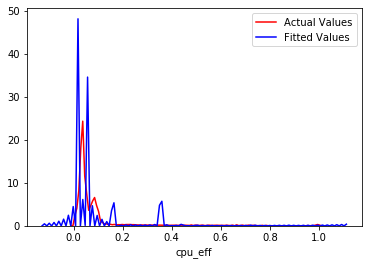

In [39]:
ax1 = sn.distplot(y_test, hist=False, color="r", label="Actual Values")
ax1 = sn.distplot(y_pred, hist=False, color="b", label="Fitted Values" , ax=ax1)

The spread of values looks about right.

Next, we use the output from the Neural Network for classification.

## Evaluation - Classification

In [40]:
# define inefficient tasks as tasks with < 75% efficiency
y_testc = y_test > 0.75
y_testc = LabelEncoder().fit_transform(y_testc)

In [41]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [75]:
ypredc = y_pred > 0.75
ypredc = LabelEncoder().fit_transform(ypredc)

In [43]:
pd.DataFrame(confusion_matrix(y_testc, ypredc))

,0,1
0,153862,140
1,1790,527


In [44]:
tn, fp, fn, tp = confusion_matrix(y_testc, ypredc).ravel()
print("True Negative", tn)
print("True Positive", tp)
print("False Negative", fn)
print("False Positive", fp)

True Negative 153862
True Positive 527
False Negative 1790
False Positive 140


In [45]:
print(classification_report(y_testc, ypredc, labels=None, target_names=None, sample_weight=None, digits=2, output_dict=False, zero_division='warn'))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99    154002
           1       0.79      0.23      0.35      2317

    accuracy                           0.99    156319
   macro avg       0.89      0.61      0.67    156319
weighted avg       0.99      0.99      0.98    156319



The model accuracy here is misleading. A huge proportion of the data is inefficient, so simply predicting everything as inefficient would yield very high accuracy scores. The model is not able to detect when a data point is in fact efficient - as evidenced by the low recall. The confusion matrix also shows a higher false negative rate than true positive rate, meaning the neural network is really unable to distinguish efficiency.

The F1-Score is of interest here - it is the harmonic mean of precision and recall. A high F1-Score means our model is good at discerning between efficient and inefficient jobs.

We can try to improve upon our model by sampling the data again to make the 2 classes more balanced, and training another neural network. 

## Training 2.0 - Resampling

I use undersampling of inefficient jobs to resample the data. 

In [47]:
y_trainc = y_train>0.75
y_trainc.describe()

count     625273
unique         2
top        False
freq      616021
Name: cpu_eff, dtype: object

In [48]:
y_efficient = y_trainc[y_trainc]

In [49]:
len(y_efficient)

9252

In [50]:
y_inefficient = y_trainc[~y_trainc].sample(len(y_efficient))

In [51]:
y_undersample = pd.concat([y_inefficient, y_efficient], axis=0)

In [52]:
y_train_undersample = y_train[np.sort(y_undersample.index)] 

In [53]:
X_train_undersample = pbs[np.array(np.sort((y_undersample.index)))]

In [54]:
X_train_10_undersample = X_train_undersample[:,selector.get_support()].astype(float)

In [55]:
len(X_train_10_undersample)

18504

### Classification Task v2

Create a new model for this classifcation task, and adjust the following hyper parameters.

1. Since this is a classifcation task, I changed the activation function to Sigmoid, and we will be aiming to minimise the binary cross entropy.
2. Since we undersampled, the amount of data used has decreased significantly. We can add more layers and epochs without the computation time being excessive.

In [56]:
modelc = Sequential()
modelc.add(Dense(12, input_dim=10, kernel_initializer='normal', activation='relu'))
modelc.add(Dense(8, activation='relu'))
modelc.add(Dense(8, activation='relu'))
modelc.add(Dense(1, activation='sigmoid'))
modelc.summary()
modelc.compile(loss="binary_crossentropy", optimizer="adam", metrics=['accuracy'])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 12)                132       
_________________________________________________________________
dense_7 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_8 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 9         
Total params: 317
Trainable params: 317
Non-trainable params: 0
_________________________________________________________________


In [58]:
nnc = modelc.fit(X_train_10_undersample.astype(float), np.array(y_train_undersample > 0.75), epochs=25, batch_size=10,  verbose=1, validation_split=0.2)

Train on 14803 samples, validate on 3701 samples
Epoch 1/25
14803/14803 [==============================] - 2s 121us/sample - loss: 0.2255 - accuracy: 0.9052 - val_loss: 0.2094 - val_accuracy: 0.9087
Epoch 2/25
14803/14803 [==============================] - 2s 121us/sample - loss: 0.2244 - accuracy: 0.9064 - val_loss: 0.1566 - val_accuracy: 0.9089
Epoch 3/25
14803/14803 [==============================] - 2s 126us/sample - loss: 0.2234 - accuracy: 0.9051 - val_loss: 0.1637 - val_accuracy: 0.9081
Epoch 4/25
14803/14803 [==============================] - 2s 121us/sample - loss: 0.2216 - accuracy: 0.9060 - val_loss: 0.1630 - val_accuracy: 0.9084
Epoch 5/25
14803/14803 [==============================] - 2s 129us/sample - loss: 0.2209 - accuracy: 0.9060 - val_loss: 0.1682 - val_accuracy: 0.9084
Epoch 6/25
14803/14803 [==============================] - 2s 128us/sample - loss: 0.2215 - accuracy: 0.9063 - val_loss: 0.1497 - val_accuracy: 0.9084
Epoch 7/25
14803/14803 [===========================

In [59]:
ypredc_undersample =  modelc.predict(X_test_10)

In [77]:
ypredc_undersample = ypredc_undersample > 0.75

In [78]:
tn, fp, fn, tp = confusion_matrix(y_testc, ypredc).ravel()
print("True Negative", tn)
print("True Positive", tp)
print("False Negative", fn)
print("False Positive", fp)
pd.DataFrame(confusion_matrix(y_testc, ypredc_undersample))

True Negative 153862
True Positive 527
False Negative 1790
False Positive 140


,0,1
0,137951,16051
1,245,2072


In [79]:
print(classification_report(y_testc, ypredc_undersample, labels=None, target_names=None, sample_weight=None, digits=2, output_dict=False, zero_division='warn'))

              precision    recall  f1-score   support

           0       1.00      0.90      0.94    154002
           1       0.11      0.89      0.20      2317

    accuracy                           0.90    156319
   macro avg       0.56      0.90      0.57    156319
weighted avg       0.99      0.90      0.93    156319



The classification task using undersampled inefficient jobs yields a much higher recall, but lower precision. This means the model has correctly identified 80% of all efficient cases, but at the same time only 11% of all the cases it says are efficient were actually so.

We proceed to train a regression task using the undersampled data as well.

### Regression Task v2
We use the same model architecture as before (same layers and activation functions) but with the undersampled data as the training set. Because the amount of data has reduced drastically, we also ramp up the number of training epochs.

In [63]:
model2 = Sequential()
model2.add(Dense(12, input_dim=10, kernel_initializer='normal', activation='relu'))
model2.add(Dense(8, activation='relu'))
model2.add(Dense(1, activation='linear'))
model2.summary()
model2.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 12)                132       
_________________________________________________________________
dense_11 (Dense)             (None, 8)                 104       
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 9         
Total params: 245
Trainable params: 245
Non-trainable params: 0
_________________________________________________________________


In [67]:
nn2 = model2.fit(X_train_10_undersample.astype(float), np.array(y_train_undersample), epochs=25, batch_size=10,  verbose=1, validation_split=0.2)

Train on 14803 samples, validate on 3701 samples
Epoch 1/25
14803/14803 [==============================] - 2s 114us/sample - loss: 0.0341 - mse: 0.0341 - mae: 0.1081 - val_loss: 0.0358 - val_mse: 0.0358 - val_mae: 0.1041
Epoch 2/25
14803/14803 [==============================] - 2s 118us/sample - loss: 0.0337 - mse: 0.0337 - mae: 0.1076 - val_loss: 0.0316 - val_mse: 0.0316 - val_mae: 0.1004
Epoch 3/25
14803/14803 [==============================] - 2s 117us/sample - loss: 0.0336 - mse: 0.0336 - mae: 0.1073 - val_loss: 0.0375 - val_mse: 0.0375 - val_mae: 0.0895
Epoch 4/25
14803/14803 [==============================] - 2s 113us/sample - loss: 0.0337 - mse: 0.0337 - mae: 0.1061 - val_loss: 0.0346 - val_mse: 0.0346 - val_mae: 0.0947
Epoch 5/25
14803/14803 [==============================] - 2s 116us/sample - loss: 0.0334 - mse: 0.0334 - mae: 0.1055 - val_loss: 0.0327 - val_mse: 0.0327 - val_mae: 0.0933
Epoch 6/25
14803/14803 [==============================] - 2s 117us/sample - loss: 0.0332 - 

In [69]:
ypred2 = model2.predict(X_test_10)
ypred2 = ypred2 > 0.75
ypred2 = LabelEncoder().fit_transform(ypred2)
print(pd.DataFrame(confusion_matrix(y_testc, ypred2)))
print(classification_report(y_testc, ypred2, labels=None, target_names=None, sample_weight=None, digits=2, output_dict=False, zero_division='warn'))

        0     1
0  151518  2484
1     995  1322
              precision    recall  f1-score   support

           0       0.99      0.98      0.99    154002
           1       0.35      0.57      0.43      2317

    accuracy                           0.98    156319
   macro avg       0.67      0.78      0.71    156319
weighted avg       0.98      0.98      0.98    156319



The regression task with undersampled data has a higher f1-score compared to the first model using all the original data. 

We compile the 3 models trained into a table:

In [71]:
m2 = classification_report(y_testc, ypred2, labels=None, target_names=None, sample_weight=None, digits=2, output_dict=True, zero_division='warn')

In [76]:
m1 = classification_report(y_testc, ypredc, labels=None, target_names=None, sample_weight=None, digits=2, output_dict=True, zero_division='warn')

In [81]:
mc = classification_report(y_testc, ypredc_undersample, labels=None, target_names=None, sample_weight=None, digits=2, output_dict=True, zero_division='warn')

In [119]:
f1_0 = [x["0"]["f1-score"] for x in [m1,mc,m2]]
r0 = [x["0"]["recall"] for x in [m1,mc,m2]]
r1 = [x["1"]["recall"] for x in [m1,mc,m2]]
p0 = [x["0"]["precision"] for x in [m1,mc,m2]]
p1 = [x["1"]["precision"] for x in [m1,mc,m2]]
f1_1 = [x["1"]["f1-score"] for x in [m1,mc,m2]]
f1_macro = [x["macro avg"]["f1-score"] for x in [m1,mc,m2]] 
acc = [x["accuracy"] for x in [m1,mc,m2]]

model_performance = pd.DataFrame([f1_0, f1_1, f1_macro, r0, r1, p0, p1, acc]).transpose()
model_performance.columns = ["F1_Inefficient", "F1_Efficient", "Macro_Avg_F1", 'Recall_Inefficient', "Recall_Efficient", "Precision_Inefficient", "Precision_Efficient", "Accuracy"]
model_performance.index = ["Regression, all data", "Classification, undersampled", "Regression, undersampled"]

In [122]:
modelc.save('modelc.h5')

In [123]:
model.save('model.h5')

In [125]:
model2.save('model.h5')

### Model Comparisons

In [120]:
model_performance

,F1_Inefficient,F1_Efficient,Macro_Avg_F1,Recall_Inefficient,Recall_Efficient,Precision_Inefficient,Precision_Efficient,Accuracy
"Regression, all data",0.993767,0.353217,0.673492,0.999091,0.227449,0.988500,0.790105,0.987653
"Classification, undersampled",0.944230,0.202740,0.573485,0.895774,0.894260,0.998227,0.114330,0.895752
"Regression, undersampled",0.988650,0.431814,0.710232,0.983870,0.570565,0.993476,0.347346,0.977744


##### Regression with all Data 
The highest accuracy is achieved using the regression task with all data points. However this model also has the lowest recall but highest precision for predicting efficient jobs.
This model rejects 99.9% of all inefficient jobs but lets through only 23% of actually efficient jobs. 

If it is very important to ONLY allow efficient jobs through, then this is the most suitable model. That is, if processing inefficient jobs costs more than rejecting actually efficient jobs.

##### Classification with undersampled Data
This model does not perform well when compared to the other models. It has a weak average F1 and lowest accuracy. It is however able to detect 90% of the actually efficient jobs, compared to the other models which are unable to do so.
It rejects 89.6% of all inefficient jobs, and lets in 89.4% of all efficient jobs.

If it is very important to allow ALL efficient jobs through, then this is the most suitable model. That is, if rejecting efficient jobs costs more than processing inefficient jobs.

##### Regressiong with undersampled Data
The model performs very well - it has the highest average F1-Score and has the second highest accuracy. 

This model is able to reject 98% of all inefficient jobs while letting through 50% of efficient jobs. It is a more balanced model compared to the above 2.

##### Conclusion
In our HPC Efficiency use case, there are much much more inefficient jobs than efficient jobs. 
From a user's stanpoint, if we use model 1 or 3, efficient requests have a 50% chance of being rejected. This makes these models disruptive.

In contrast, we can strike a balance by by rejecting 90% of all inefficient jobs while letting 90% of efficient requests through with the 2nd model. This seems like the best approach.
